In [1]:
import pandas as pd

file_path = '/Users/nancybaraka/Downloads/amz_uk_price_prediction_dataset.csv'
amz_data = pd.read_csv(file_path)

amz_data.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
category_bestseller_crosstab = pd.crosstab(amz_data['category'], amz_data['isBestSeller'])


category_bestseller_crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:

amz_data['isBestSeller'].unique()

array([False,  True])

In [11]:
bestseller_percentage = category_bestseller_crosstab.div(category_bestseller_crosstab.sum(axis=1), axis=0) * 100

bestseller_percentage_only = bestseller_percentage[True] 

bestseller_percentage_only_sorted = bestseller_percentage_only.sort_values(ascending=False)

bestseller_percentage_only_sorted


category
Grocery                             5.813467
Smart Home Security & Lighting      5.769231
Health & Personal Care              5.768628
Mobile Phone Accessories            4.247104
Power & Hand Tools                  3.533895
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: True, Length: 296, dtype: float64

In [13]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(category_bestseller_crosstab)

chi2_stat, p_val, dof


(36540.20270061387, 0.0, 295)

In [15]:
import numpy as np

n = category_bestseller_crosstab.sum().sum()  
cramers_v = np.sqrt(chi2_stat / (n * (min(category_bestseller_crosstab.shape) - 1)))

cramers_v


0.1222829439760564

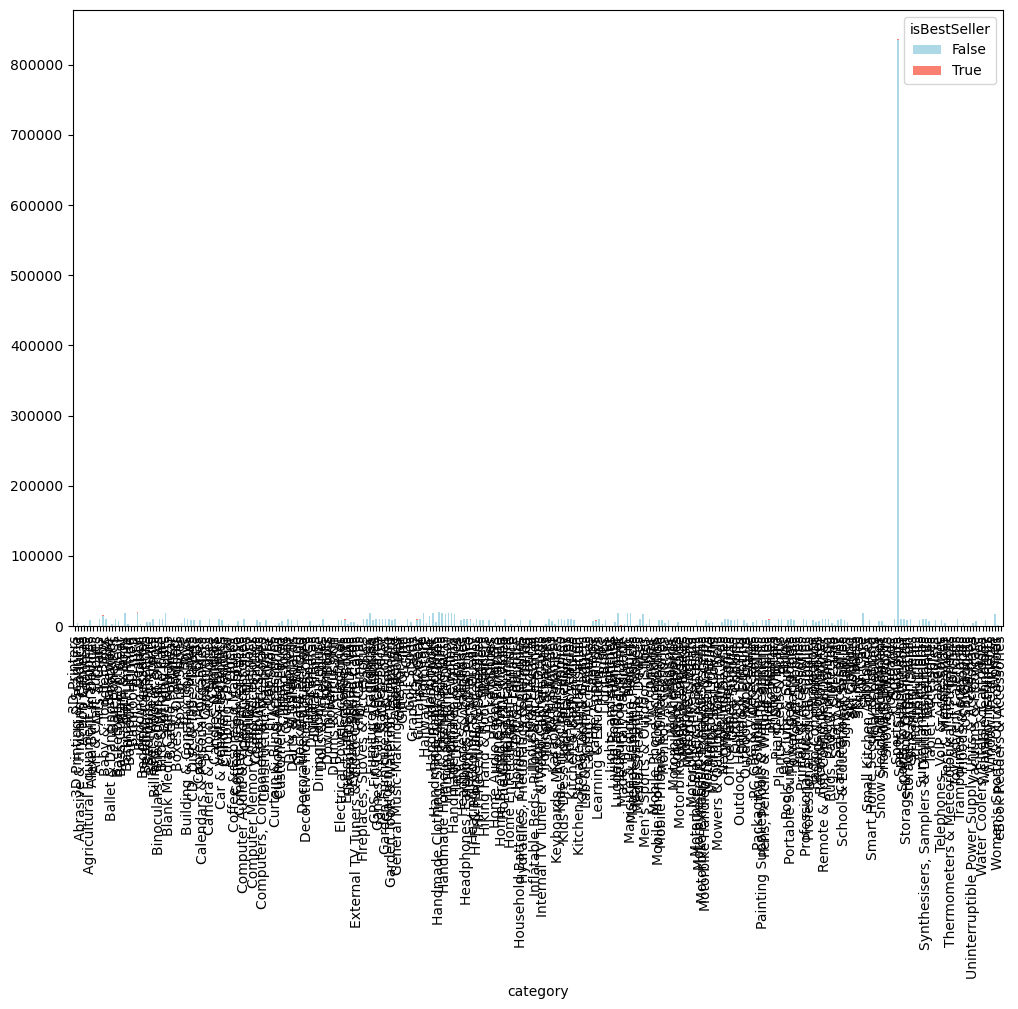

In [23]:
import matplotlib.pyplot as plt

category_bestseller_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'salmon'])
plt.show()

In [25]:
Q1 = amz_data['price'].quantile(0.25)
Q3 = amz_data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

amz_data_no_outliers = amz_data[(amz_data['price'] >= lower_bound) & (amz_data['price'] <= upper_bound)]

amz_data_no_outliers.shape

(2115963, 9)

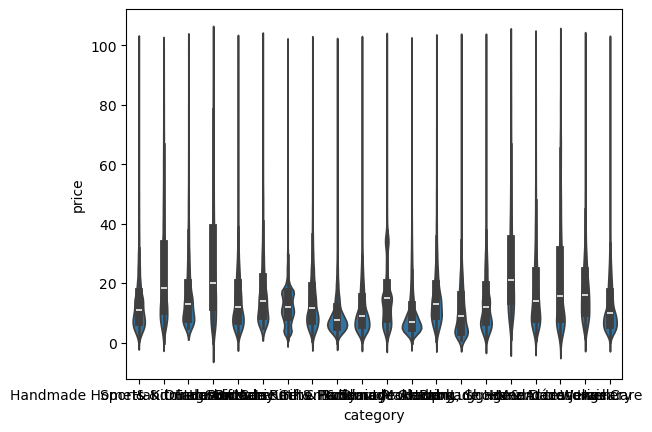

('Desktop PCs', 74.0)

In [31]:
import seaborn as sns
top_20_categories = amz_data_no_outliers['category'].value_counts().head(20).index
filtered_data = amz_data_no_outliers[amz_data_no_outliers['category'].isin(top_20_categories)]

sns.violinplot(data=filtered_data, x='category', y='price')
plt.show()

median_prices = amz_data_no_outliers.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

highest_median_category, highest_median_price

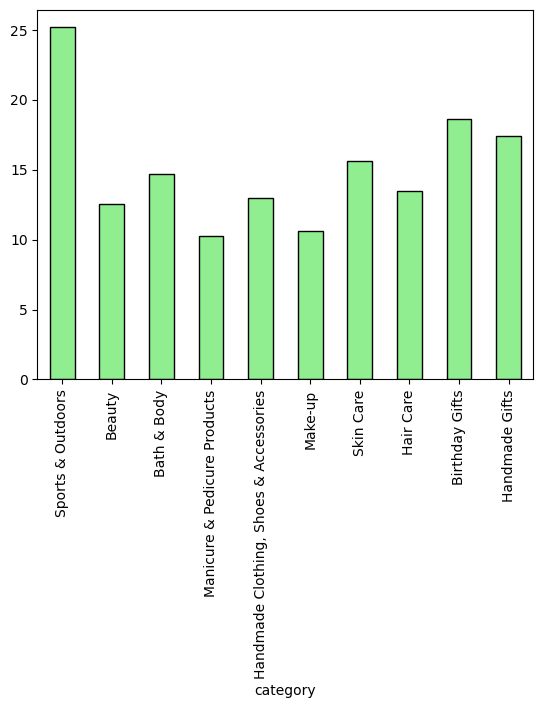

('Motherboards', 68.77243243243242)

In [33]:
average_price_by_category = amz_data_no_outliers.groupby('category')['price'].mean()
top_10_categories_by_count = amz_data_no_outliers['category'].value_counts().head(10).index

average_price_top_10 = average_price_by_category[top_10_categories_by_count]

average_price_top_10.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.show()

highest_avg_price_category = average_price_by_category.idxmax()
highest_avg_price = average_price_by_category.max()

highest_avg_price_category, highest_avg_price

/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_12218/3843442283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_ratings, x='category', y='stars', palette="coolwarm")


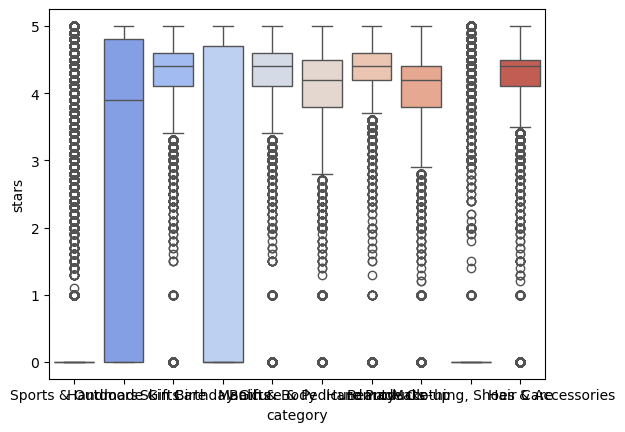

('Computer Memory', 4.7)

In [37]:
top_10_categories = amz_data_no_outliers['category'].value_counts().head(10).index
filtered_data_ratings = amz_data_no_outliers[amz_data_no_outliers['category'].isin(top_10_categories)]

sns.boxplot(data=filtered_data_ratings, x='category', y='stars', palette="coolwarm")
plt.show()

median_ratings = amz_data_no_outliers.groupby('category')['stars'].median()
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

highest_median_rating_category, highest_median_rating


In [41]:
correlation_price_rating = amz_data_no_outliers['price'].corr(amz_data_no_outliers['stars'])

correlation_price_rating


-0.07767299878181352

In [43]:
correlation_price_rating = amz_data_no_outliers['price'].corr(amz_data_no_outliers['stars'])

print(correlation_price_rating)

-0.07767299878181352
